# Projet reconnaissance de chiffres écrits

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist, boston_housing
from keras import models
from keras import layers

from sklearn.model_selection import KFold

In [16]:
# un dataset de chiffres pré-loadé sur keras
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Les images sont encodées dans des array Numpy (tensor) et les labels sont simplement des tableaux de chiffres. Le modèle va apprendre sur les données de train et vont être testées sur le test. Dans ce dataset pré-loadé, les chiffres vont de 0 à 9.

In [5]:
train_images.shape

(60000, 28, 28)

On a donc ici un tableau à 3 dimensions. Premièrement, il y a dans 60 000 images, les images ont un taille de 28px (height) par 28px (width).

Les dataset de deeplearning n'apprennnent pas tout le dataset en une fois. C'est pour cela qu'on découpe un dataset en batchs.

Ici, on fait le choix de définir un batch de 10. C'est à dire que le modèle va s'entrainer sur 10 "images" à la fois.

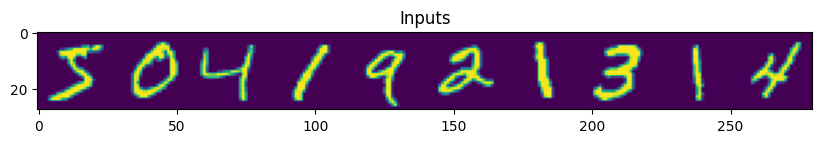

Labels: [5 0 4 1 9 2 1 3 1 4]


In [9]:
batch_size = 10 # on définit un batch de

inputs = train_images[0:batch_size,:,:] # on sélectionne les  premières images qui sont associées
labels = train_labels[0:batch_size] # on prend les labels des images

# ceci permet de visualiser les "images" sélectionnées
plt.figure(figsize=(10,5))
plt.imshow(np.hstack([inputs[i,:,:] for i in range(inputs.shape[0])]))
plt.title("Inputs")
plt.show()
print("Labels: " + str(labels))

## Création d'un réseau de neurones (fully connected)

In [10]:
network = models.Sequential() # un réseau séquentiel
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) # on doit mettre la taille des images qu'on va rentrer d'où le 28*28
network.add(layers.Dense(64, activation='relu')) # ces lignes permettent de crée un réseau de neuronnes fully connected (Dense layer)
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(10, activation='softmax')) # cette ligne permet d'avoir 10 (car de 0 à 9) sorties possible et de faire la prédiction sur les probas de ces sorties

Maintenant nous avons créé le réseau de neuronnes pour faire l'entrainement de nos datas.

Il faut que l'on rajoute une loss function, ce qui permet d'évaluer si on est "proche" des valeurs qu'on attendait ou non. La fonction de côut, prend la prédiction effectuée par le réseau de neurones et la compare avec "vraie" sortie (target).

On peut aussi choisir un optimizer, ce qui permet de réduire le loss. La startégie de cela, permet d'ajuster les poids (weights) dans le but de réduire le loss.

Il implémente le "Backpropagation algorithm", ce que nous avons vu en cours récemment.

On sélectionne la loss function, cross_entropy car nous faisons face à un problème de multiclassification (0 à 9).

Nous prenons l'Adam optimizer ici car il une version accélérée du Stochastic Gradient Descent.
C'est un algorithme qui initialise les poids du modèle au hasard au début. A chaque epoch (itération d'entraineement) il sélectionne un lot de données de manière aléatoire à entrainer.

Il mets à jour les poids de sorte à ce que la fonction de perte (l'écart entre les vraies valeurs et les prédictions) soit minimisée.

In [11]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Avant d'entrainer notre modèle et nos images, nous devons nous assurer que les images aient la bonne forme pour être placée en paramètre du modèle.

Nous avons la forme suivante : (60 000, 28,28) et nos "valeurs" sont entre 0 et 255. Hors, nous souhaitons que ces valeurs soient entre 0 et 1 donc nous allons devoir diviser par 255. De plus, nous souhaitons avoir la forme suivante :
(60 000, 28*28)

In [12]:
train_images = train_images.reshape((60000, 28 * 28)) # on fait le reshape pour le train
train_images = train_images.astype('float32') / 255 # on fair la division mentionnée précédemment

test_images = test_images.reshape((10000, 28 * 28)) # on fait pareil pour les données de test
test_images = test_images.astype('float32') / 255

Nous devons par ailleurs encoder les labels, en effet la multi-classe classification à besoin qu'ils soient one-Hot Encoded.

In [13]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
train_labels # on vérifie qu'ils soient correctement encodées

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

On peut désormais entrainer le modèle avec la fonction "fit" presente dans Keras.
Pour cette fonction on est libre de choisir le nombre d'epoch que l'on souhaite et le batch_size que l'on veut.

Ici, on prend 10 epochs et un batch_size de 500 mais on pourrait faire autrement.

In [16]:
history = network.fit(train_images, train_labels, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 5s 25ms/step - loss: 0.6799 - accuracy: 0.7775
Epoch 2/10
120/120 [==============================] - 3s 22ms/step - loss: 0.1667 - accuracy: 0.9524
Epoch 3/10
120/120 [==============================] - 3s 22ms/step - loss: 0.1105 - accuracy: 0.9676
Epoch 4/10
120/120 [==============================] - 4s 33ms/step - loss: 0.0843 - accuracy: 0.9757
Epoch 5/10
120/120 [==============================] - 3s 23ms/step - loss: 0.0617 - accuracy: 0.9818
Epoch 6/10
120/120 [==============================] - 3s 23ms/step - loss: 0.0480 - accuracy: 0.9859
Epoch 7/10
120/120 [==============================] - 4s 30ms/step - loss: 0.0365 - accuracy: 0.9896
Epoch 8/10
120/120 [==============================] - 5s 41ms/step - loss: 0.0312 - accuracy: 0.9905
Epoch 9/10
120/120 [==============================] - 3s 28ms/step - loss: 0.0236 - accuracy: 0.9934
Epoch 10/10
120/120 [==============================] - 3s 26ms/step - loss: 0.0186 - accura

Comme on peut le voir, lorsque l'entrainement des données se fait nou pouvous visualiser la loss et l'accuracy du réseau de neurones sur les données d'entrainement. On constate que très rapidement on converge vers les 100% (sans les atteindre évidemment)  

Text(0.5, 0, 'Epochs')

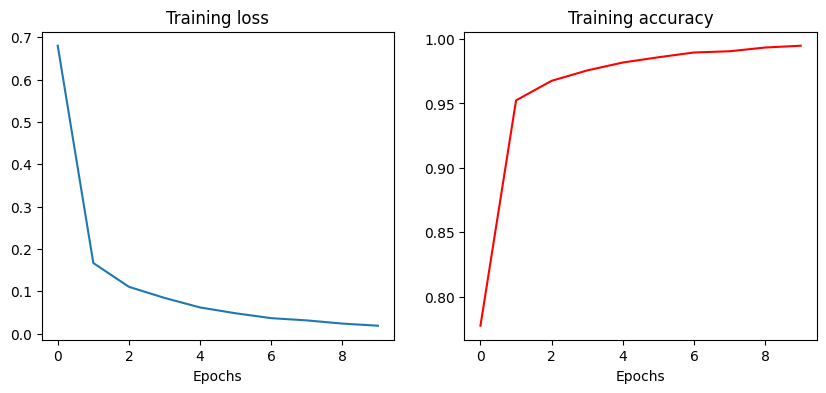

In [17]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.plot(history.history['loss'])
ax1.set_title('Training loss')
ax1.set_xlabel('Epochs')

ax2.plot(history.history['accuracy'],'r')
ax2.set_title('Training accuracy')
ax2.set_xlabel('Epochs')

On constate sur les graphiques précédents, la loss décrit au fur et a mesure des epochs tandis que l'accuracy augmente. Cela est bel et bien normal car au fur et à mesure de l'entrainement le modèle devient meilleur. Néanmoins, il faut faire attention au surapprentissage (overfitting).


Maintenant que nous avons entrainé le modèle, il faut le tester. C'est pourquoi, nous allons essayer de prédire correctement les chiffres du dataset d'entrainement.

In [18]:
predictions = network.predict(test_images)

313/313 [==============================] - 2s 5ms/step


Comme on peut le costater ci-dessous, les prédictions sont faite pour chacune des classe. On garde la prédiction qui possède la meilleure probabilité.
Si j'ai la probabilité d'avoir un 5 à hauteur de 80% et que les autres porbabilités sont donc plus petites que celle-là alors on va prédire le fait que le chiffre est bel et bien un 5.

In [19]:
predictions[0]

array([1.7346186e-06, 7.2427065e-07, 7.7200777e-05, 8.1140381e-05,
       3.1915764e-07, 4.5135931e-07, 2.0246911e-10, 9.9972427e-01,
       2.0642960e-06, 1.1205630e-04], dtype=float32)

In [20]:
np.argmax(predictions[0])

7

On peut voir qu'au dessus la valeur de la prédiction est la plus grande pour un 7.

Ci-dessous, on décide de prédire un "batch" des données de test. Et d'effectuer des prédictions dessus. D'un côté, on visualise les données (les vrais chiffres) et de l'autre on indique le chiffre ayant la prlus grande probabilité.

On peut constater que sur ce test, on a plutot bien réussi à prédire.

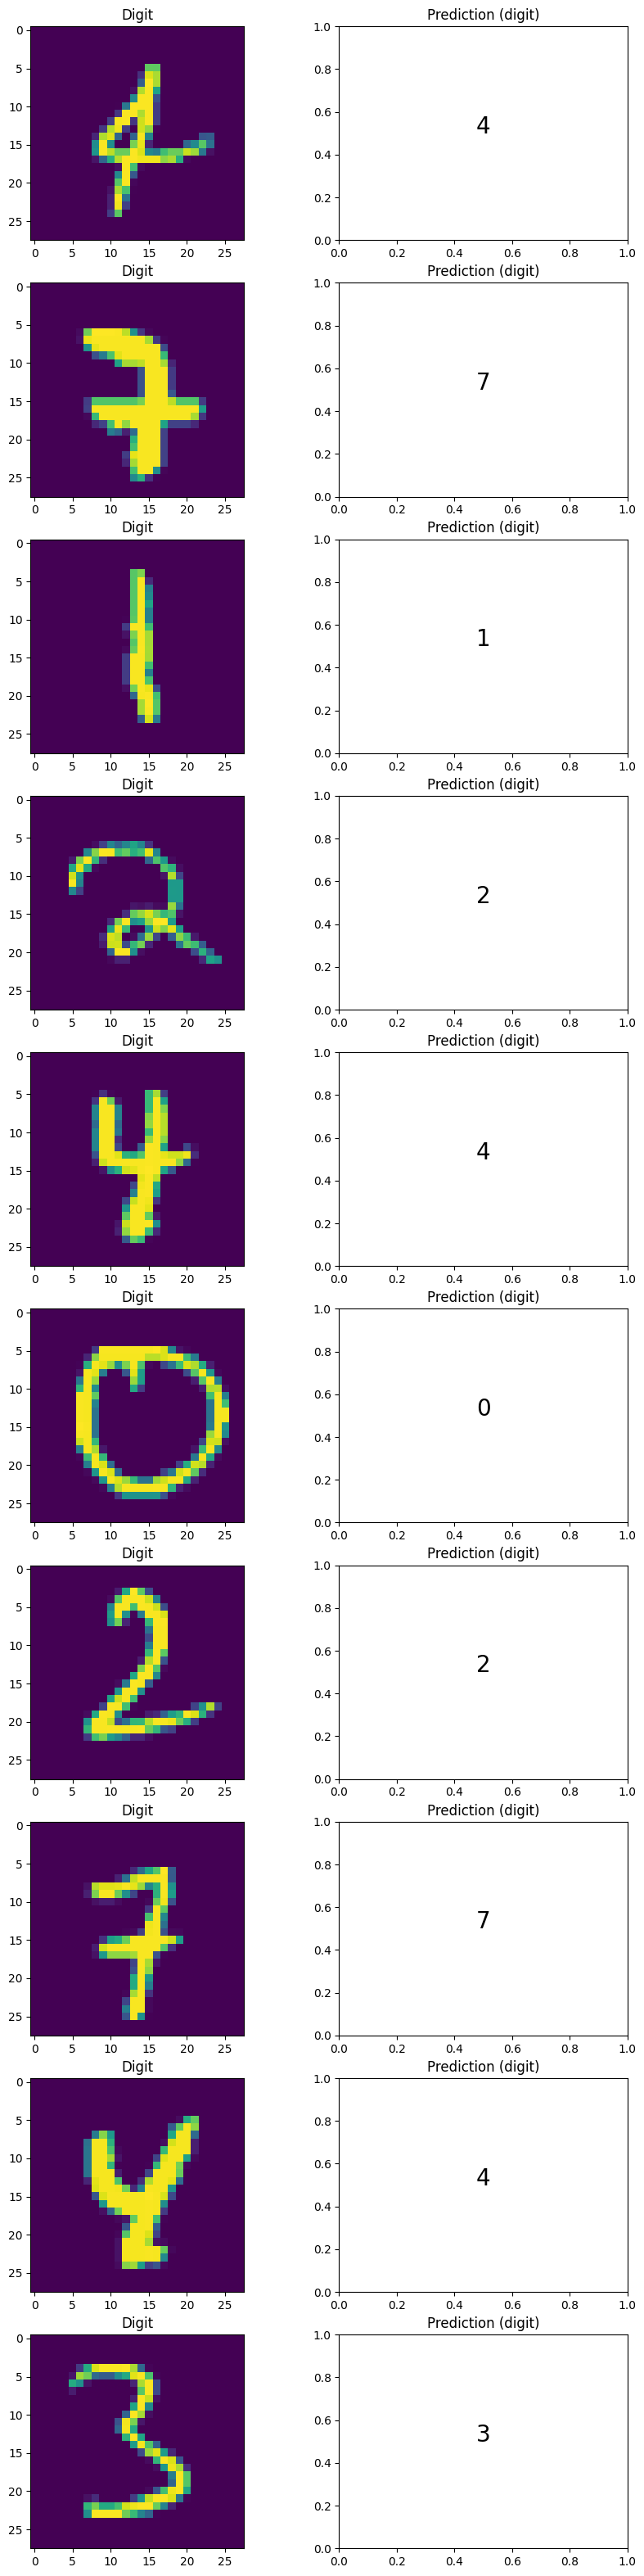

In [24]:
n = 30
inputs  = test_images[n*batch_size : (n+1)*batch_size,:].reshape(batch_size, 28, 28)
outputs = predictions[n*batch_size : (n+1)*batch_size,:]

f, ax = plt.subplots(batch_size, 2, figsize=(10, 4 * batch_size))
for i in range(batch_size):
    ax[i, 0].imshow(inputs[i, :, :])
    ax[i, 0].set_title("Digit")

    predicted_digit = np.argmax(outputs[i, :])  # proba max du chiffre
    ax[i, 1].text(0.5, 0.5, str(predicted_digit), fontsize=20, ha='center')  # affiche le chiffre prédit

    ax[i, 1].set_title("Prediction (digit)")
    #ax[i, 1].axis('off')  # Désactiver les axes pour la deuxième sous-figure

plt.show()


## Evaluation des performances du modèle

A l'aide de la fonction evaluate, on peut constater l'accuracy et la loss totale sur les données de test.
L'objectif est d'avoir la plus petite loss mais l'accuracy la plus élevée. En espérant que celle-ci soit à peu près semblable à celle qu'on avait sur les données d'entrainemt.

In [25]:
loss, acc = network.evaluate(test_images, test_labels)

print("loss : ", loss)
print("acc : ", acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0720 - accuracy: 0.9785
loss :  0.07203495502471924
acc :  0.9785000085830688


COmme on peut très correctement le remarquer, l'accuracy est ici de ~0.97 alors qu'elle était d'environ 0.99 sur les données de test.

Heuresement, cette différence est minime au regard de toutes les données.

# Modèle multi-couches avec convolution

On reprend donc ce qui avait été fait avant. C'est à dire loader les données MNIST de Keras.


On a besoin de reshaper les images car ce réseau ne prend ps en parmètre les même shapes, pour les raisons qui sont expliquées en dessous.

Nous avons donc simplement besoin de faire un réseau de convolution.

### Création d'un nouveau network pour la convolution

La différence majeure entre les fully-connected layers (Dense layer) et les ConvNet est le fait que pour les Dense layers ils apprennnet les patterns globaux (3D) alors que les réseaux de convolution apprennet les patterns au niveau local dans la 2D.


On normalise les données pour qu'elles se situe sur une plage spécifique comprise entre 0 et 1, ce qui permet de rendre les données plus facilement comparables et plus facile à traiter pour le modèle. 255 car les images sont en niveau de gris avec 0 (noir) et 255 (blanc) et donc en divisant ces valeurs par 255 on les rend plus facilement exploitable.

Les réseaux de neurones de convolution s'attendent à reçevoir une forme particulière sous forme de tensuers avec les dimensions suivantes : largeur, hauteur , "couleurs".
Ici, on sait que les images sont de taille 28, 28 et que les images sont en niveau de gris soit 1.
Donc on peut redimensionner en (60 000, 28,28,1) avec 60 000 le nombre d'images.

In [17]:
# Normaliser les images et les redimensionner
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [18]:
test_images.shape

(10000, 28, 28, 1)

Ici, on a fait un modèle CNN simple avec seuelemnt 3 couches accompagnées de couches de maxpooling, ce qui permet de réduire la dimensionalité.
On a mis à la fin 2 couches de fully connected layers pour la clasification.

La sortie du Conv2D et du MaxPooling2D est un 3d tensor. C'est pour cela qu'on doit utiliser flatten(), ce qui nous permet de renvenir à un verteur 1D.
On doit donc avoir Dense layer de 64 hidden layers puis un dueième de 10 en sortie pour pouvoir prédire les 10 classes avec une activation softmax.

Le 1er paramètre dans un layser.Conv2D est le nombre de filtres (canaux de sorties). Plus le nombre de filtres est conséquent plus le modèle à une capacité à extraire des informations sur l'image, le problème est le fait que celui-ci augmente le nombre de paramètre et risque donc le surapprentissage.
Le second paramètre définit la taille du noyau de convolution, c'est un "objet" qui permet d'extraire des caractéristiques locales. Ici, on a pris (3,3).

Le layer.Maxpooling2D permet de définir la taille de l'"objet" et son pas de déplacement. Le pooling permet sous-échantillonner ce qui réduit la dimensionalité d'une image tout en gardant les informations "essentielles".

On utilise relu au départ car elle permet d'ajouter de la linéarité dans le modèle.

In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Une nouvelle fois on doit one-hot encoder les labels.

In [19]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Une nouvelle fois on doit compiler le modèle et utiliser la loss cross-entropy car il s'agit d'une multi-classe.

Puis entrainer le modèle en lui fournissant des données de d'entrainement.


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # on comile le modèle
mod = model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 69s 52ms/step - loss: 0.0679 - accuracy: 0.9792
Epoch 2/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0382 - accuracy: 0.9879
Epoch 3/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0291 - accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0221 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0176 - accuracy: 0.9944


## Evaluation du modèle

Comme on peut le voir au dessus, le temps d'exécution de cet algorithme est bien supérieur au précédent. Cependant, l'accuracy sur les données d'entrainement est plutôt semblable à la précédente.

Text(0.5, 0, 'Epochs')

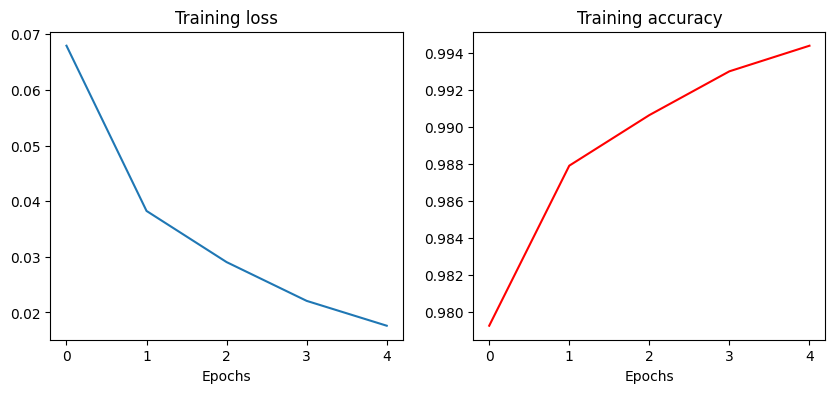

In [25]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.plot(mod.history['loss'])
ax1.set_title('Training loss')
ax1.set_xlabel('Epochs')

ax2.plot(mod.history['accuracy'],'r')
ax2.set_title('Training accuracy')
ax2.set_xlabel('Epochs')

On peut constater qu'on a une accruracy supérieur au réseau de neurones précédent et une loss 2 fois inférieure.

In [26]:
loss, acc = model.evaluate(test_images, test_labels) # on évalue le modèle sur les données de test maintenant
print("loss : ", loss)
print("acc : ", acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0301 - accuracy: 0.9900
loss :  0.03009898029267788
acc :  0.9900000095367432
